In [1]:
import pandas as pd
import numpy as np
from pennylane import numpy as np
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

import pennylane as qml
from pennylane.templates.embeddings import AngleEmbedding, AmplitudeEmbedding
from pennylane.optimize import AdamOptimizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


import time
start = time.time()

In [52]:
df = pd.read_csv("C:\\Users\ACER\\anaconda3\\envs\\py310\\ipynb\\data\\PE-HEADER-MALWARE.csv", sep=',')

In [3]:
df.drop(['packer_type'],axis=1,inplace=True)

In [4]:
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
# Separate class
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]# print shape
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2488, 69)
class 1: (2722, 69)


In [6]:
df = df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [7]:
df.drop(['index'],axis=1,inplace=True)

In [8]:
df

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,232,4,1,0,1,...,1,1,3,0,0.000000,6.461023,48128,6.489179,0,1
1,144,3,4,65535,184,200,4,1,1,1,...,1,1,3,0,7.573679,7.985679,324096,7.727609,0,1
2,144,3,4,65535,184,224,9,1,0,1,...,1,8,1,0,0.000000,6.125864,229376,7.644101,0,1
3,144,3,4,65535,184,200,2,1,0,1,...,1,0,2,0,1.410063,0.000000,13584,6.235727,1,0
4,144,3,4,65535,184,128,6,1,0,1,...,1,1,5,0,6.489846,5.766548,25600,6.489901,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,232,5,1,0,1,...,1,1,4,0,6.357401,0.362120,95744,7.620282,1,1
5206,144,3,4,65535,184,248,4,1,1,1,...,1,1,3,0,0.000000,0.199479,105472,5.627812,0,1
5207,144,3,4,65535,184,224,6,1,0,1,...,1,2,4,0,6.476961,0.000000,93696,7.651273,1,1
5208,144,3,4,65535,184,216,7,1,0,1,...,1,3,4,0,6.584842,2.666768,123906,6.714817,1,1


In [9]:
df_5=df[0:5210]

In [10]:
df_5

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,232,4,1,0,1,...,1,1,3,0,0.000000,6.461023,48128,6.489179,0,1
1,144,3,4,65535,184,200,4,1,1,1,...,1,1,3,0,7.573679,7.985679,324096,7.727609,0,1
2,144,3,4,65535,184,224,9,1,0,1,...,1,8,1,0,0.000000,6.125864,229376,7.644101,0,1
3,144,3,4,65535,184,200,2,1,0,1,...,1,0,2,0,1.410063,0.000000,13584,6.235727,1,0
4,144,3,4,65535,184,128,6,1,0,1,...,1,1,5,0,6.489846,5.766548,25600,6.489901,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,232,5,1,0,1,...,1,1,4,0,6.357401,0.362120,95744,7.620282,1,1
5206,144,3,4,65535,184,248,4,1,1,1,...,1,1,3,0,0.000000,0.199479,105472,5.627812,0,1
5207,144,3,4,65535,184,224,6,1,0,1,...,1,2,4,0,6.476961,0.000000,93696,7.651273,1,1
5208,144,3,4,65535,184,216,7,1,0,1,...,1,3,4,0,6.584842,2.666768,123906,6.714817,1,1


In [11]:
# Separate class
class_0 = df_5[df_5['class'] == 0]
class_1 = df_5[df_5['class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2488, 69)
class 1: (2722, 69)


In [12]:
# Read CSV & sets/samples
df_5 = df_5.astype(float)
train,test = train_test_split(df_5, test_size=0.30, random_state=2)
train_set = train
test_set = test
train_set = train_set.sample(160)
test_set = test_set.sample(40)
np.random.seed(42)

In [13]:
df_5.info

<bound method DataFrame.info of       e_cblp  e_cp  e_cparhdr  e_maxalloc   e_sp  e_lfanew  NumberOfSections  \
0      144.0   3.0        4.0     65535.0  184.0     232.0               4.0   
1      144.0   3.0        4.0     65535.0  184.0     200.0               4.0   
2      144.0   3.0        4.0     65535.0  184.0     224.0               9.0   
3      144.0   3.0        4.0     65535.0  184.0     200.0               2.0   
4      144.0   3.0        4.0     65535.0  184.0     128.0               6.0   
...      ...   ...        ...         ...    ...       ...               ...   
5205   144.0   3.0        4.0     65535.0  184.0     232.0               5.0   
5206   144.0   3.0        4.0     65535.0  184.0     248.0               4.0   
5207   144.0   3.0        4.0     65535.0  184.0     224.0               6.0   
5208   144.0   3.0        4.0     65535.0  184.0     216.0               7.0   
5209   144.0   3.0        4.0     65535.0  184.0     232.0               4.0   

      C

In [14]:
df_5.describe()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,class
count,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.0,...,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5210.000000,5.210000e+03,5210.000000,5210.000000,5210.000000
mean,152.658733,10.633589,8.903263,65137.618234,202.530902,222.833013,4.662956,0.990403,0.362764,1.0,...,0.999040,1.360845,3.302111,0.156430,4.939586,2.523549,7.875718e+05,6.364756,0.544146,0.522457
std,616.499070,392.745064,251.685103,5005.606042,968.625098,48.591497,1.922882,0.097502,0.480844,0.0,...,0.030967,1.623972,1.146956,0.363297,2.521787,2.685909,5.293440e+06,1.119881,0.498095,0.499543
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536000e+03,0.939626,0.000000,0.000000
25%,144.000000,3.000000,4.000000,65535.000000,184.000000,208.000000,4.000000,1.000000,0.000000,1.0,...,1.000000,1.000000,3.000000,0.000000,3.886006,0.000000,6.144000e+04,5.695785,0.000000,0.000000
50%,144.000000,3.000000,4.000000,65535.000000,184.000000,232.000000,5.000000,1.000000,0.000000,1.0,...,1.000000,1.000000,4.000000,0.000000,6.148211,1.555973,1.218560e+05,6.390618,1.000000,1.000000
75%,144.000000,3.000000,4.000000,65535.000000,184.000000,248.000000,5.000000,1.000000,1.000000,1.0,...,1.000000,2.000000,4.000000,0.000000,6.507072,4.685836,3.055480e+05,7.314531,1.000000,1.000000
max,37008.000000,20050.000000,12851.000000,65535.000000,65534.000000,648.000000,34.000000,1.000000,1.000000,1.0,...,1.000000,31.000000,8.000000,1.000000,7.999859,7.999620,1.657081e+08,7.999997,1.000000,1.000000


In [15]:
# Separate labels
x_train = train_set
y_train = train_set[['class']]
x_test = test_set
y_test = test_set[['class']]

In [16]:
# Reduce dimensionnnnnnnnnnn PCA to fit the dimensions with the qubits
n_dim = 2
pca = PCA(n_components=n_dim)
pca.fit(x_train)
x_train = pca.transform(x_train)
pca.fit(x_test)
x_test = pca.transform(x_test)

In [17]:
# Normaliziasi

std_scale = StandardScaler().fit(x_train)
data = std_scale.transform(x_train)
std_scale = StandardScaler().fit(x_test)
x_test = std_scale.transform(x_test)

In [18]:
# balance variabel target > train
y_train.value_counts(normalize=True)*100

class
0.0      53.125
1.0      46.875
Name: proportion, dtype: float64

In [19]:
# Review test
y_test.value_counts(normalize=True)*100

class
1.0      55.0
0.0      45.0
Name: proportion, dtype: float64

In [20]:
# Angle Encoding

num_qubits = n_dim

dev = qml.device('default.qubit', wires = num_qubits)

@qml.qnode(dev)
def circuit(parameters, data):
    for i in range(num_qubits):
        qml.Hadamard(wires = i)  
    AngleEmbedding(features = data, wires = range(num_qubits), rotation = 'Y')
    qml.StronglyEntanglingLayers(weights = parameters, wires = range(num_qubits))
    return qml.expval(qml.PauliZ(0))

In [21]:
num_layers = 5
weights_init = 0.01 * np.random.randn(num_layers, num_qubits, 3, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

print(weights_init, bias_init)

[[[ 0.00543743 -0.0061543  -0.01197806]
  [ 0.02141658 -0.00094621 -0.00928828]]

 [[-0.0088523  -0.00412188 -0.00482619]
  [ 0.00164165  0.00233095  0.00117995]]

 [[ 0.01462378  0.01538715 -0.02439106]
  [ 0.00603441 -0.00251044 -0.00163867]]

 [[-0.0147633   0.01486981 -0.00024455]
  [ 0.00355551  0.00417011  0.00832462]]

 [[-0.00293399 -0.00029839  0.00095126]
  [ 0.00664654 -0.00140218 -0.00033193]]] 0.0


In [22]:
circuit(weights_init, data[0])

tensor(-0.17642012, requires_grad=True)

In [23]:
def variational_classifier(weights, bias, x):
    return circuit(weights, x) + bias
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss
def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss
def cost(weights, bias, X, Y):
    predictions = [variational_classifier(weights, bias, x) for x in X]
    return square_loss(Y, predictions)

In [24]:
Y = np.array(y_train.values[:,0] * 2 - np.ones(len(y_train.values[:,0])), requires_grad = False)  # shift label from {0, 1} to {-1, 1}
X = np.array(data, requires_grad=False)

for i in range(5):
    print("X = {}, Y = {: d}".format(list(X[i]), int(Y[i])))

X = [tensor(-0.19386028, requires_grad=False), tensor(1.8021241, requires_grad=False)], Y = -1
X = [tensor(-0.1862246, requires_grad=False), tensor(-0.27480988, requires_grad=False)], Y =  1
X = [tensor(-0.18694136, requires_grad=False), tensor(-0.05331027, requires_grad=False)], Y =  1
X = [tensor(-0.18599111, requires_grad=False), tensor(-0.33867088, requires_grad=False)], Y = -1
X = [tensor(-0.18592412, requires_grad=False), tensor(-0.22942722, requires_grad=False)], Y =  1


In [25]:
opt = AdamOptimizer(stepsize=0.1, beta1=0.9, beta2=0.99, eps=1e-08)
batch_size = 10

In [50]:
%%time
weights = weights_init
bias = bias_init
wbest = 0
bbest = 0
abest = 0

# List untuk menyimpan MSE dan ACC pada setiap iterasi
mse_history = []
acc_history = []

for it in range(100):

    batch_index = np.random.randint(0, len(X), (batch_size,))
    X_batch = X[batch_index]
    Y_batch = Y[batch_index]
    weights, bias, _, _ = opt.step(cost, weights, bias, X_batch, Y_batch)

    # komputasi akurasi rediksi
    predictions = [np.sign(variational_classifier(weights, bias, x)) for x in X]
    current_acc = accuracy(Y, predictions)
    current_mse = cost(weights, bias, X, Y)
    
    if accuracy(Y, predictions) > abest:
        wbest = weights
        bbest = bias
        abest = accuracy(Y, predictions)
        print('Diperbarui')
        mse_history.append(current_mse)
        acc_history.append(current_acc)
        acc = accuracy(Y, predictions)

    print(
        "Iteration: {:5d} | MSE: {:0.7f} | ACC: {:0.7f} ".format(
            it + 1, cost(weights, bias, X, Y), acc
        )
    )
print ("selesai")

Diperbarui
Iteration:     1 | MSE: 1.0145421 | ACC: 0.5062500 
Diperbarui
Iteration:     2 | MSE: 1.0099169 | ACC: 0.5125000 
Diperbarui
Iteration:     3 | MSE: 1.0051586 | ACC: 0.5250000 
Iteration:     4 | MSE: 0.9925298 | ACC: 0.5250000 
Diperbarui
Iteration:     5 | MSE: 0.9876208 | ACC: 0.5437500 
Iteration:     6 | MSE: 0.9854980 | ACC: 0.5437500 
Iteration:     7 | MSE: 0.9939996 | ACC: 0.5437500 
Iteration:     8 | MSE: 0.9889084 | ACC: 0.5437500 
Diperbarui
Iteration:     9 | MSE: 1.0084069 | ACC: 0.5500000 
Iteration:    10 | MSE: 1.0118986 | ACC: 0.5500000 
Iteration:    11 | MSE: 1.0404894 | ACC: 0.5500000 
Iteration:    12 | MSE: 1.0337177 | ACC: 0.5500000 
Iteration:    13 | MSE: 0.9823733 | ACC: 0.5500000 
Iteration:    14 | MSE: 0.9469973 | ACC: 0.5500000 
Diperbarui
Iteration:    15 | MSE: 0.9599707 | ACC: 0.5937500 
Iteration:    16 | MSE: 0.9997373 | ACC: 0.5937500 
Iteration:    17 | MSE: 0.9978639 | ACC: 0.5937500 
Iteration:    18 | MSE: 0.9827477 | ACC: 0.5937500

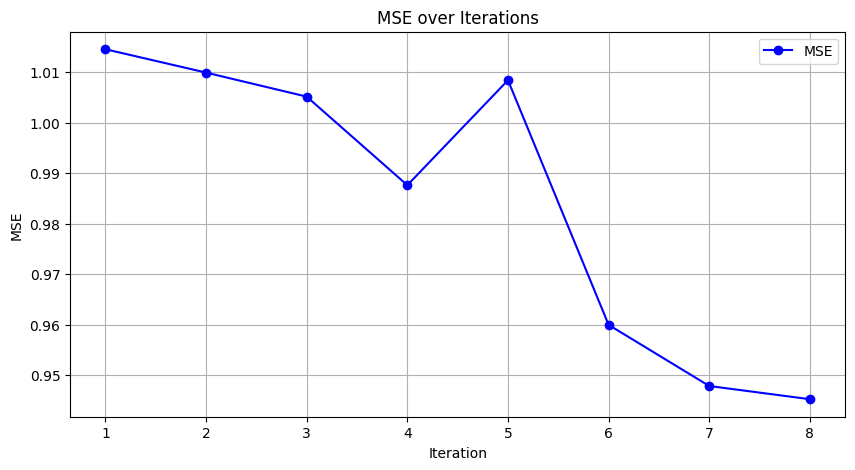

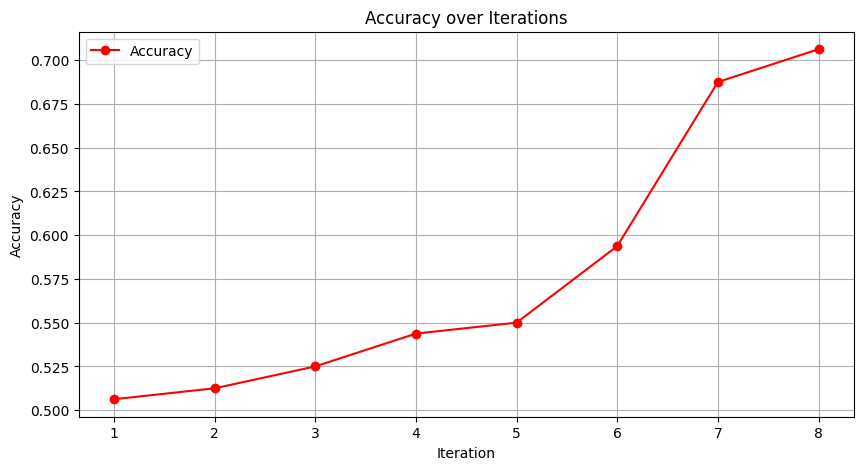

In [51]:
import matplotlib.pyplot as plt

# Assuming you have accumulated mse_history and acc_history lists during iterations

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mse_history) + 1), mse_history, marker='o', linestyle='-', color='b', label='MSE')
plt.title('MSE over Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(acc_history) + 1), acc_history, marker='o', linestyle='-', color='r', label='Accuracy')
plt.title('Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [53]:
Y_testScaled = np.array(y_test.values[:, 0] * 2 - np.ones(len(y_test.values[:, 0])))
X_testNormalized = np.array(normalize(x_test))


In [54]:
predictions = [np.sign(variational_classifier(wbest, bbest, x)) for x in X_testNormalized]
pred = [np.sign(variational_classifier(wbest, bbest, x)) for x in X]
acc = accuracy(Y_testScaled, predictions)

print(f'Cost: {cost(wbest, bbest, X_testNormalized, Y_testScaled)}, Accuracy: {np.round(acc, 2) * 100}%')

Cost: 0.9032036954406774, Accuracy: 56.99999999999999%


In [55]:
pd.DataFrame((predictions, Y_testScaled), ('Predictions', 'Test')).T

,Predictions,Test
0,-1.0,1.0
1,1.0,1.0
2,-1.0,-1.0
3,-1.0,1.0
4,-1.0,-1.0
5,-1.0,-1.0
6,1.0,1.0
7,-1.0,1.0
8,1.0,1.0
9,-1.0,-1.0


In [56]:
from sklearn import metrics

# Print the classification report
print("Classification Report:")
print(metrics.classification_report(Y_testScaled, predictions))
# Print precision score
precision = metrics.precision_score(Y_testScaled, predictions)
print(f"Precision: {precision:.4f}")
# Print recallscore
recall = metrics.recall_score(Y_testScaled, predictions)
print(f"Recall: {recall:.4f}")
# Print F1-score
f1 = metrics.f1_score(Y_testScaled, predictions)
print(f"F1-score: {f1:.4f}")
# Print balanced accuracy score
balanced_accuracy = metrics.balanced_accuracy_score(Y_testScaled, predictions)
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.52      0.94      0.67        18
         1.0       0.86      0.27      0.41        22

    accuracy                           0.57        40
   macro avg       0.69      0.61      0.54        40
weighted avg       0.70      0.57      0.53        40

Precision: 0.8571
Recall: 0.2727
F1-score: 0.4138
Balanced Accuracy: 0.6086
